In [36]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("penguins_size.csv", header = 0)

In [4]:
df.head(3)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE


In [6]:
df.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [7]:
df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [9]:
df = df[['island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'species']]

In [10]:
df.head(3)

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,species
0,Torgersen,39.1,18.7,181.0,3750.0,MALE,Adelie
1,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,Adelie
2,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,Adelie


In [12]:
df.duplicated().sum()

0

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   island             344 non-null    object 
 1   culmen_length_mm   342 non-null    float64
 2   culmen_depth_mm    342 non-null    float64
 3   flipper_length_mm  342 non-null    float64
 4   body_mass_g        342 non-null    float64
 5   sex                334 non-null    object 
 6   species            344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [25]:
df.isnull().sum().sum()

18

In [17]:
df.shape

(344, 7)

In [26]:
df = df.dropna()

In [27]:
df.shape

(334, 7)

In [29]:
df.island.value_counts()

Biscoe       164
Dream        123
Torgersen     47
Name: island, dtype: int64

In [30]:
df.species.value_counts()

Adelie       146
Gentoo       120
Chinstrap     68
Name: species, dtype: int64

In [32]:
df.skew()

culmen_length_mm     0.044569
culmen_depth_mm     -0.144090
flipper_length_mm    0.352752
body_mass_g          0.465714
dtype: float64

In [96]:
df.sex.unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [102]:
df.sex = df.sex.replace('.',df.sex.mode()[0])

In [103]:
df.sex.unique()

array(['MALE', 'FEMALE'], dtype=object)

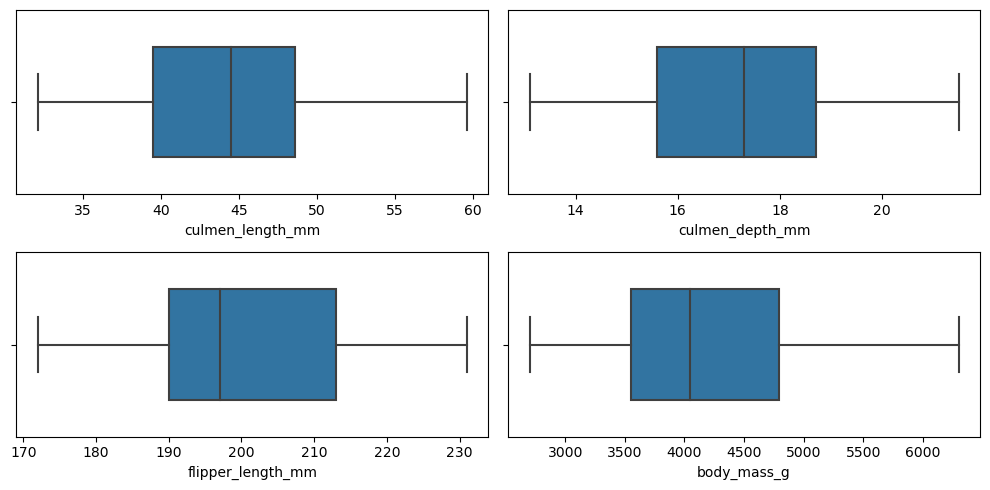

In [104]:
plt.figure(figsize=(10,5))

i = 1
for cols in df.select_dtypes(include='number').columns:
    plt.subplot(2,2,i);i+=1
    sns.boxplot(x = df[cols], width=0.6)
    plt.tight_layout()


<Axes: >

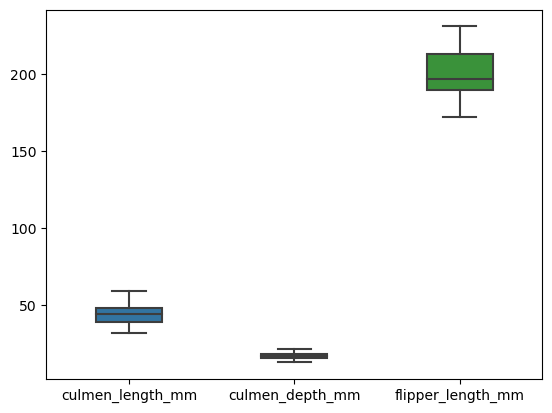

In [105]:
df1 = df[['culmen_length_mm', 'culmen_depth_mm','flipper_length_mm']]
sns.boxplot(data=df1, width=0.4)

In [106]:
df.head(3)

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,species
0,Torgersen,39.1,18.7,181.0,3750.0,MALE,Adelie
1,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,Adelie
2,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,Adelie


In [107]:
X = pd.get_dummies(df.drop('species', axis = 1), drop_first = True)
y = df['species']

In [109]:
df.sex.unique()

array(['MALE', 'FEMALE'], dtype=object)

In [110]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 6)

In [111]:
from sklearn.tree import DecisionTreeClassifier

dt_default = DecisionTreeClassifier(random_state=0)
dt_default.fit(X_train, y_train)

ypred_test = dt_default.predict(X_test)
ypred_train = dt_default.predict(X_train)

from sklearn.metrics import accuracy_score

print(accuracy_score(y_train, ypred_train))
print(accuracy_score(y_test, ypred_test))

from sklearn.model_selection import cross_val_score
print(cross_val_score(dt_default, X, y, cv = 5).mean())

1.0
0.9850746268656716
0.9699683401175939


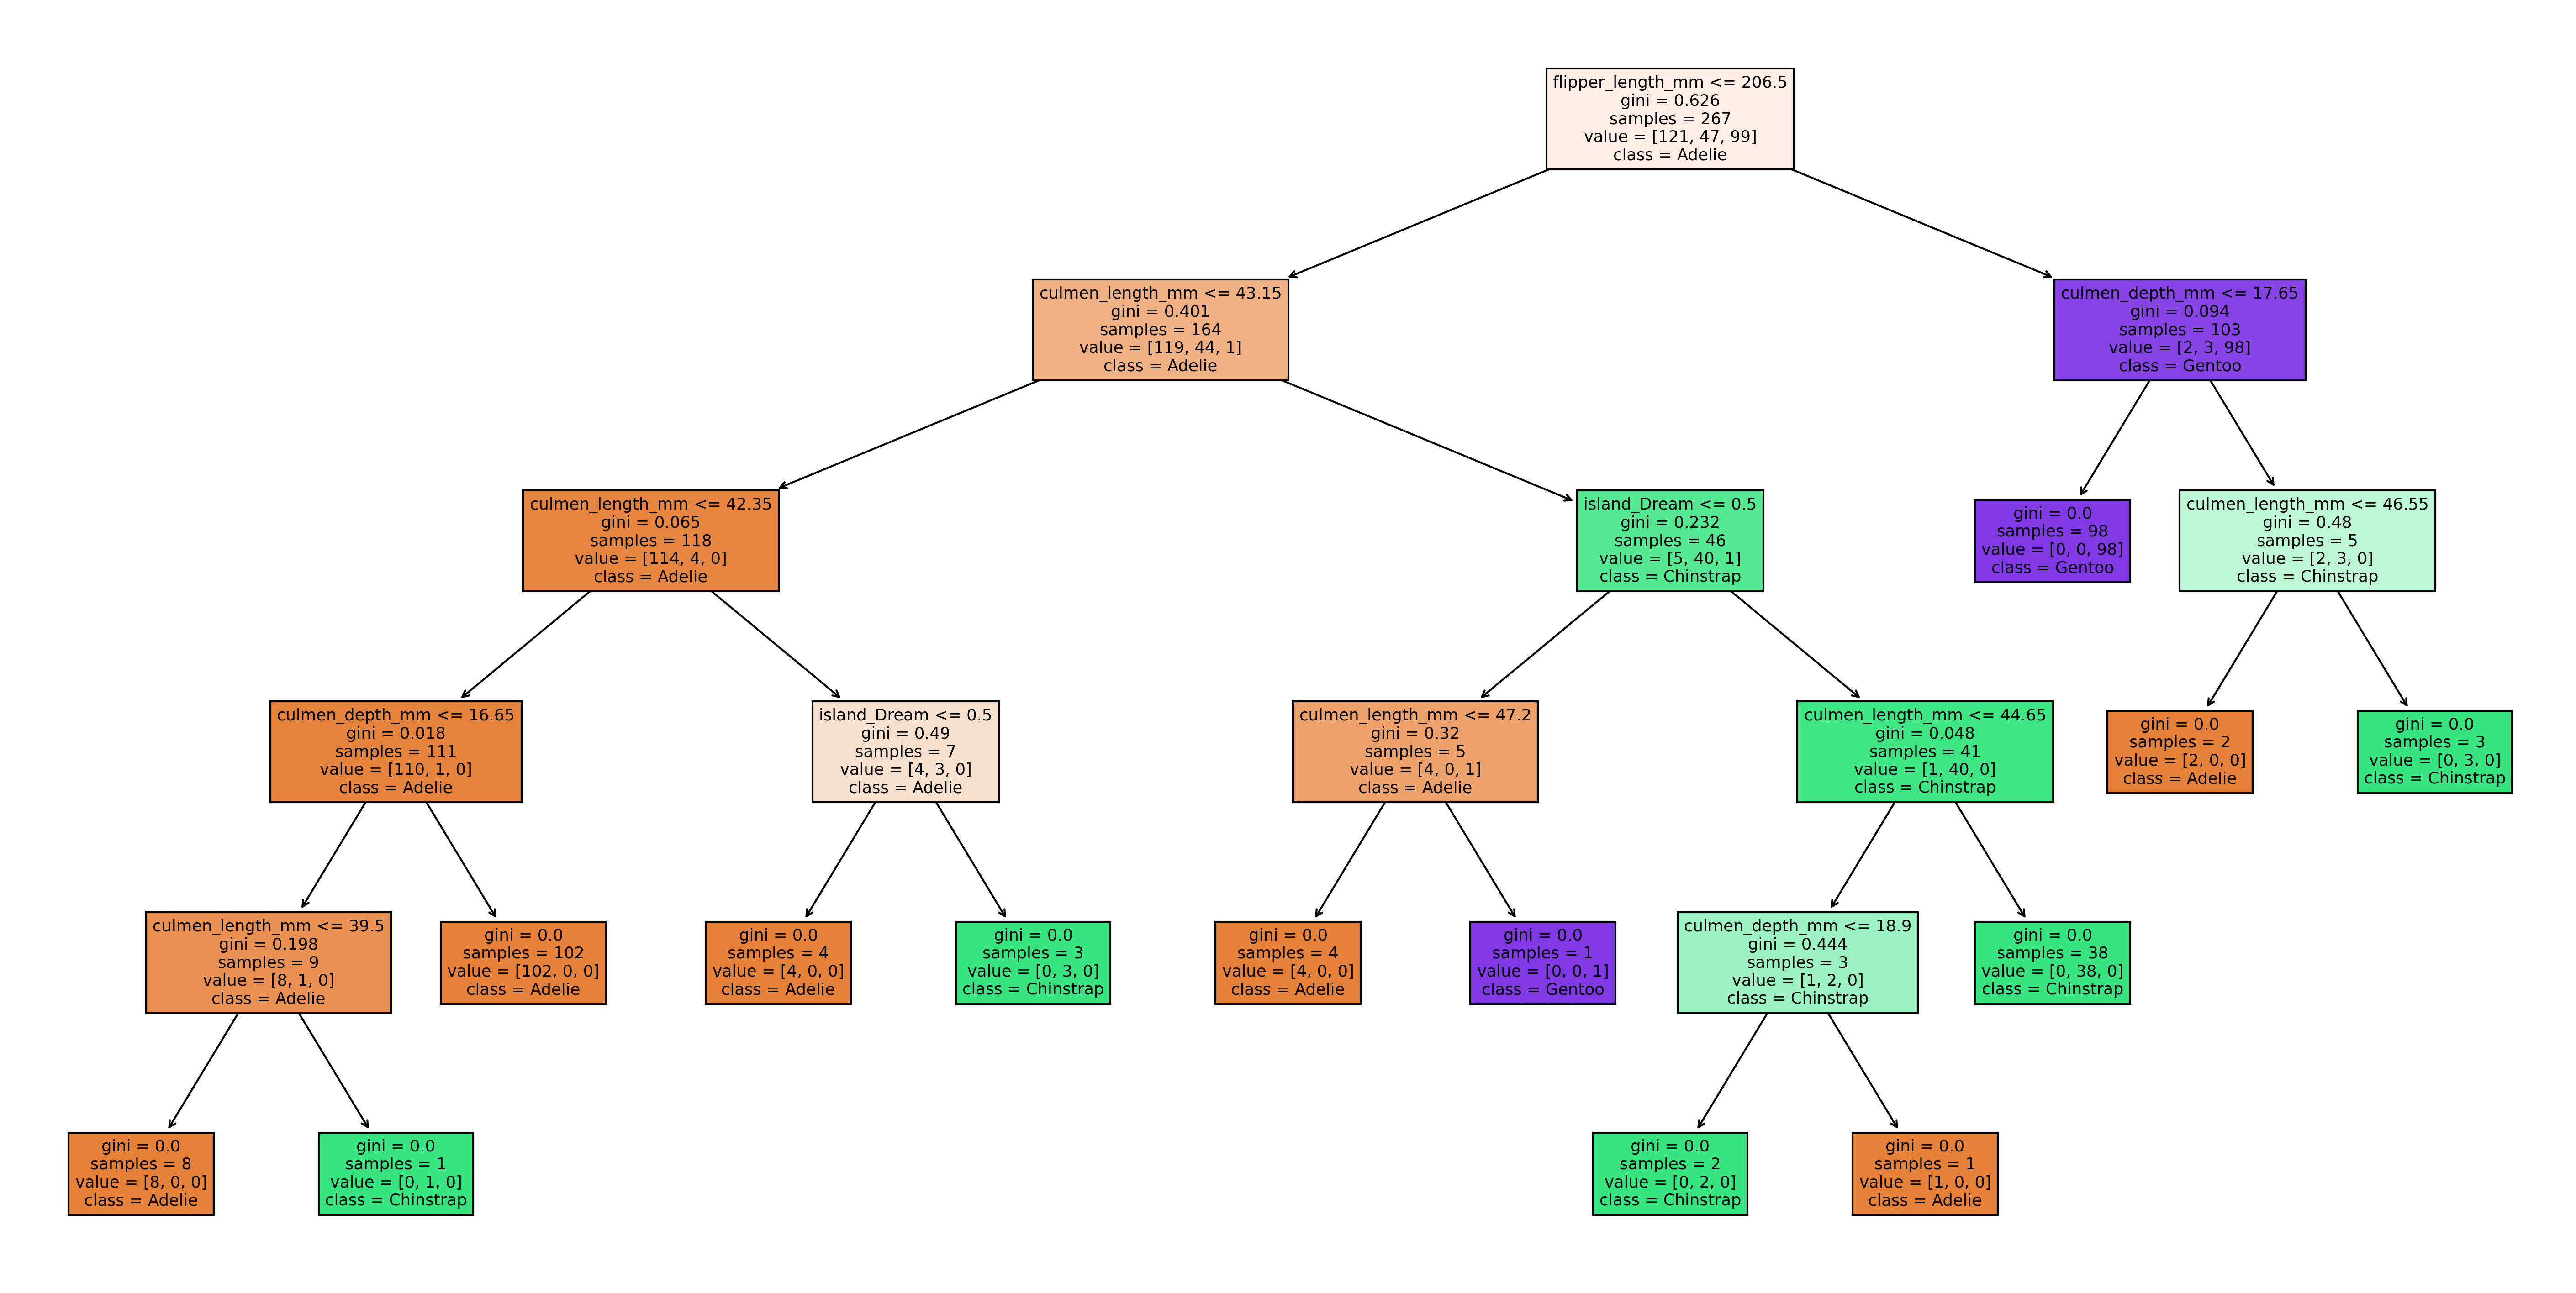

In [116]:
from sklearn.tree import plot_tree
plt.figure(figsize= (24,12), dpi=300)

plot_tree(dt_default,
          filled=True,
          feature_names= ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'island_Dream', 'island_Torgersen', 'sex_MALE'],
          class_names= ['Adelie', 'Chinstrap', 'Gentoo'])
plt.show()

In [114]:
X_train.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'island_Dream', 'island_Torgersen', 'sex_MALE'],
      dtype='object')

In [120]:
from sklearn.model_selection import GridSearchCV

estimator = DecisionTreeClassifier(random_state=0)

param_grid = {'criterion': ["gini", "entropy"],
               'max_depth': [1,2,3,4,5]}

grid = GridSearchCV(estimator, param_grid, scoring='accuracy', cv = 5)

grid.fit(X_train, y_train)

grid.best_params_

{'criterion': 'gini', 'max_depth': 4}

In [121]:
grid.best_estimator_.feature_importances_

array([0.32178855, 0.04531702, 0.55896655, 0.        , 0.04327939,
       0.        , 0.03064849])

In [124]:
feats = pd.DataFrame(data = grid.best_estimator_.feature_importances_,
                     index = X.columns,
                     columns=['Importance Feature'])
feats_imp = feats[feats['Importance Feature'] > 0]

important_features_list = feats_imp.index.to_list()

In [125]:
X_imp = X[important_features_list]

X_train, X_test, Y_train, y_test = train_test_split(X_imp, y, test_size=0.2, random_state=6)

final_dt_model = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)
final_dt_model.fit(X_train,y_train)

ypred_train = final_dt_model.predict(X_train)
ypred_test = final_dt_model.predict(X_test)

print('Train accuracy : ', accuracy_score(y_train, ypred_train))
print('Test accuracy : ', accuracy_score(y_test, ypred_test))
print('Cross validation : ', cross_val_score(final_dt_model, X_imp, y , cv = 5).mean())


Train accuracy :  1.0
Test accuracy :  0.9701492537313433
Cross validation :  0.9759384893713252


In [126]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, ypred_test)

array([[24,  1,  0],
       [ 1, 20,  0],
       [ 0,  0, 21]], dtype=int64)